In [18]:
import pyprsamp
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def addNoise(y, snr):
    signal_power = np.linalg.norm(y)**2 / np.dot(*y.shape)
    noise_power = signal_power / snr**2#( 10.**(snr/10) )
    noise = np.sqrt(noise_power)*np.random.randn( y.shape[0],y.shape[1] )
    return y + noise; 

## Parameters

In [20]:
# Output size of the matrix
m = 8
# Input size of the matrix
n = 50
# Number of (random) input vector to estimate the matrix 
p = 10*n
# Signal to noise ratio
snr = 25

## Generate the synthetic data

### Generate a random Gaussian matrix as the Transmission Matrix (TM)

In [21]:
Ho = np.random.rand(m,n) + np.random.randn(m,n)*1j 
Ho = Ho/np.sqrt(n); 

### Generate random binary input vectors

For $i \in \{1..p\}$, the $i^{th}$ input vector reads:

$x^i = \left[x^i_0,\dots,x^i_n\right]$ 

with $x^i_j = 0$ or $1$

In [22]:
X = np.random.rand(n,p)>0.5

### Compute output vectors and add noise

$y_i = \left|\mathbf{H} \times x_i\right| \quad \forall i \in \{1..p\}$ 

$y^{\text{noisy}}_i = y_i+b_i$

with $b_i$ a random Gaussian noise vector

We can also write in the matrix form:

$\mathbf{Y^{noisy}} = \mathbf{H} \times \mathbf{X} + \mathbf{B}$

with $\mathbf{X}$ of size $n \times p$, $\mathbf{Y^{noisy}}$ of size $m \times p$, $\mathbf{B}$ of size $m \times p$, and $\mathbf{H}$ of size $m \times n$.



In [23]:
Y = np.abs(Ho@X)
Y_noise = addNoise(np.abs(Ho@X), snr)

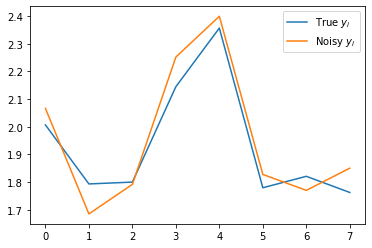

In [24]:
i = 0
plt.figure()
plt.title('Noise on amplitude measurements')
plt.plot(Y[:,i], label = r'True $y_i$')
plt.plot(Y_noise[:,i], label = r'Noisy $y_i$')
plt.legend()

In [25]:
prms = pyprsamp.prsampPrms([m,n])
prms.maxIter = 1000
prms.prec = 1e-5
#    prms.display = 1

H_hat, eps = pyprsamp.RunUntilConv(
    X,
    Y_noise,
    prms,
    repeatMax=15,
    maxIterIncrease=1.5
)


Proceeding iteration 1:	 8 rows left.
Proceeding iteration 2:	 7 rows left.
Proceeding iteration 3:	 5 rows left.
Proceeding iteration 4:	 1 rows left.
Proceeding iteration 5:	 1 rows left.
Convergence criteria met.


## Display the results

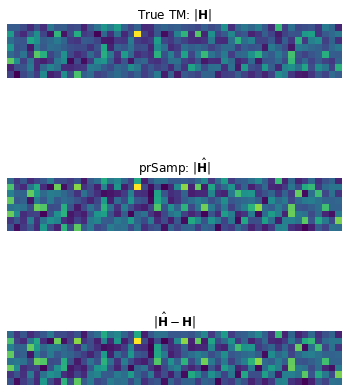

In [26]:
plt.figure(figsize = (6,8)); 
plt.subplot(311); 
plt.imshow(np.abs(Ho), interpolation ='None'); 
plt.title(r'True TM: $\|\mathbf{H}\|$')
plt.axis('off')
# plt.subplot(312); 
# plt.imshow(np.abs(H_hat), interpolation ='None')
# plt.title('Reconstructed TM with prSamp')
# plt.axis('off')
plt.subplot(312); 
plt.imshow(np.abs(H_hat),interpolation ='None')
plt.title(r'prSamp: $\|\hat{\mathbf{H}}\|$')
plt.axis('off');
plt.subplot(313); 
plt.imshow(np.abs(H_hat),interpolation ='None')
plt.title(r'$\|\hat{\mathbf{H}}-\mathbf{H}\|$')
plt.axis('off');

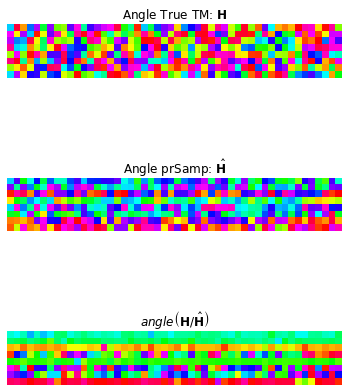

In [27]:
plt.figure(figsize = (6,8)); 
plt.subplot(311); 
plt.imshow(np.angle(Ho), interpolation ='None', cmap = 'hsv'); 
plt.title(r'Angle True TM: $\mathbf{H}$')
plt.axis('off')
plt.subplot(312); 
plt.imshow(np.angle(H_hat), interpolation ='None', cmap = 'hsv'); 
plt.title(r'Angle prSamp: $\hat{\mathbf{H}}$')
plt.axis('off')
plt.subplot(313); 
plt.imshow(np.angle(Ho/H_hat), interpolation ='None', cmap = 'hsv'); 
plt.title(r'$angle\left(\mathbf{H}/\hat{\mathbf{H}}\right)$')
plt.axis('off');